# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
from sklearn import metrics
from scipy.stats import ks_2samp

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


**1.** Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 

**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [4]:
df['sex'].nunique()

2

In [5]:
def analiseBivariadaQual(df: pd.DataFrame, variavel_resposta: str, variavel_explicativa: str) -> pd.DataFrame :
    # formatação da tabela
    ana_biv = pd.crosstab(df[variavel_explicativa], df[variavel_resposta], margins=True, margins_name='Total')
    print(f'Quantidade média de "{variavel_explicativa}":', df[variavel_explicativa].mean())

    # analises
    ana_biv[f'media_{variavel_resposta}_por_{variavel_explicativa}'] = ana_biv.iloc[:, 1]/ana_biv['Total']
    ana_biv['Odds'] = ana_biv.iloc[:, 1]/ana_biv.iloc[:, 0]
    ana_biv['Odds ratio'] = ana_biv['Odds']/ana_biv.loc[ana_biv.index[0], 'Odds']
    ana_biv['Log (Odds)'] = np.log(ana_biv['Odds'])
    ana_biv['Log (Odds ratio)'] = np.log(ana_biv['Odds ratio'])
    
    return ana_biv

In [6]:
analiseBivariadaQual(df, 'flag_doente', 'sex')

Quantidade média de "sex": 0.6798679867986799


flag_doente,0,1,Total,media_flag_doente_por_sex,Odds,Odds ratio,Log (Odds),Log (Odds ratio)
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,1.000000,-1.057790,0.000000
1.0,92,114,206,0.553398,1.239130,3.568696,0.214410,1.272200
Total,164,139,303,0.458746,0.847561,2.440976,-0.165392,0.892398


In [7]:
analiseBivariadaQual(df, 'flag_doente', 'cp')

Quantidade média de "cp": 3.1584158415841586


flag_doente,0,1,Total,media_flag_doente_por_cp,Odds,Odds ratio,Log (Odds),Log (Odds ratio)
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,1.000000,-0.826679,0.000000
2.0,41,9,50,0.180000,0.219512,0.501742,-1.516347,-0.689669
3.0,68,18,86,0.209302,0.264706,0.605042,-1.329136,-0.502457
4.0,39,105,144,0.729167,2.692308,6.153846,0.990399,1.817077
Total,164,139,303,0.458746,0.847561,1.937282,-0.165392,0.661286


In [8]:
analiseBivariadaQual(df, 'flag_doente', 'slope')

Quantidade média de "slope": 1.6006600660066006


flag_doente,0,1,Total,media_flag_doente_por_slope,Odds,Odds ratio,Log (Odds),Log (Odds ratio)
slope,,,,,,,,
1.0,106,36,142,0.253521,0.339623,1.000000,-1.079920,0.000000
2.0,49,91,140,0.650000,1.857143,5.468254,0.619039,1.698959
3.0,9,12,21,0.571429,1.333333,3.925926,0.287682,1.367602
Total,164,139,303,0.458746,0.847561,2.495596,-0.165392,0.914528


Olhado para ```Log (Odds ratio)```, a variável ```sex``` parece ser a que melhor discrimina o risco.

**2.** Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [9]:
def analiseBivariadaQuant(df: pd.DataFrame, variavel_resposta: str, variavel_explicativa: str, n_bins=5) -> pd.DataFrame :
    
    # encontrar grupos
    df[f'{variavel_explicativa}_grupo'] = pd.qcut(df[variavel_explicativa], q=n_bins)
    df[f'{variavel_explicativa}_grupo'].value_counts()

    # formatação da tabela
    ana_biv = pd.crosstab(df[f'{variavel_explicativa}_grupo'], df[variavel_resposta], margins=True, margins_name='Total')
    ana_biv.columns = ['cat1', 'cat2', 'Total']
    print(f'Quantidade média de "{variavel_explicativa}":', df[variavel_explicativa].mean())

    # analises
    ana_biv[f'media_{variavel_resposta}_por_{variavel_explicativa}'] = ana_biv['cat2']/ana_biv['Total']
    ana_biv['Odds'] = ana_biv['cat2']/ana_biv['cat1']
    ana_biv['Odds ratio'] = ana_biv['Odds']/ana_biv.loc[ana_biv.index[0], 'Odds']
    ana_biv['Log (Odds)'] = np.log(ana_biv['Odds'])
    ana_biv['Log (Odds ratio)'] = np.log(ana_biv['Odds ratio'])
    
    return ana_biv

In [10]:
analiseBivariadaQuant(df, 'flag_doente', 'age')

Quantidade média de "age": 54.43894389438944


,cat1,cat2,Total,media_flag_doente_por_age,Odds,Odds ratio,Log (Odds),Log (Odds ratio)
age_grupo,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,1.000000,-1.077559,0.000000
"(45.0, 53.0]",42,22,64,0.343750,0.523810,1.538690,-0.646627,0.430932
"(53.0, 58.0]",32,39,71,0.549296,1.218750,3.580078,0.197826,1.275385
"(58.0, 62.0]",13,32,45,0.711111,2.461538,7.230769,0.900787,1.978345
"(62.0, 77.0]",30,30,60,0.500000,1.000000,2.937500,0.000000,1.077559
Total,164,139,303,0.458746,0.847561,2.489710,-0.165392,0.912166


**3.** Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

Vou criar grupos para ```trestbps``` pois, apesar de ser qualitativas, tem muitos valores e a tabela ficaria muito grande. (Houve uma iteração para chegar a ```q=2``` olhando para a significancia ```P>|z|``` dessa variável).

In [11]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [12]:
df['trestbps_group'] = pd.qcut(df['trestbps'], 2)
df['trestbps_group'].value_counts()

(93.999, 130.0]    171
(130.0, 200.0]     132
Name: trestbps_group, dtype: int64

In [13]:
reglog = smf.logit(" flag_doente ~ C(sex, Treatment(1)) + C(cp, Treatment(4)) + C(trestbps_group, Treatment(0)) + age"
                   , data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.481965
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Mon, 25 Jul 2022   Pseudo R-squ.:                  0.3012
Time:                        14:33:54   Log-Likelihood:                -146.04
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 9.324e-25
=============================================================================================================================================
                                                                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    -2.0051      0.955     -2.100      0.036      -3.877      -0.133
C(sex, Treatment(1))[T.0.0]                                                  -1.7714      0.347     -5.106      0.000      -2.451      -1.092
C(cp, Treatment(4))[T.1.0]                                                   -2.3863      0.544     -4.389      0.000      -3.452      -1.321
C(cp, Treatment(4))[T.2.0]                                                   -2.4851      0.446     -5.571      0.000      -3.359      -1.611
C(cp, Treatment(4))[T.3.0]                                                   -2.3872      0.357     -6.688      0.000      -3.087      -1.688
C(trestbps_group, Treatment(0))[T.Interval(130.0, 200.0, closed='right')]     0.4099      0.306      1.338      0.181      -0.191       1.010
age                                                                           0.0621      0.018      3.467      0.001       0.027       0.097
=============================================================================================================================================
"""

Mesmo mudando a ditribuição dos valores de ```trestbps``` vemos que não levam a muita significância para o modelo. Vamos comparar ao modelo que considera ```trestbps``` como quantitativo e outro sem essa variável.

In [14]:
reglog = smf.logit(" flag_doente ~ C(sex, Treatment(1)) + C(cp, Treatment(4)) + trestbps + age"
                   , data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Mon, 25 Jul 2022   Pseudo R-squ.:                  0.3097
Time:                        14:33:54   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -4.0525      1.302     -3.112      0.002      -6.605      -1.500
C(sex, Treatment(1))[T.0.0]    -1.8094      0.353     -5.130      0.000      -2.501      -1.118
C(cp, Treatment(4))[T.1.0]     -2.4789      0.553     -4.485      0.000      -3.562      -1.396
C(cp, Treatment(4))[T.2.0]     -2.5406      0.452     -5.622      0.000      -3.426      -1.655
C(cp, Treatment(4))[T.3.0]     -2.4074      0.360     -6.690      0.000      -3.113      -1.702
trestbps                        0.0193      0.009      2.261      0.024       0.003       0.036
age                             0.0567      0.018      3.120      0.002       0.021       0.092
===============================================================================================
"""

In [15]:
reglog = smf.logit(" flag_doente ~ C(sex, Treatment(1)) + C(cp, Treatment(4)) + age"
                   , data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.484937
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Mon, 25 Jul 2022   Pseudo R-squ.:                  0.2969
Time:                        14:33:54   Log-Likelihood:                -146.94
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.225e-25
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.0872      0.953     -2.190      0.029      -3.956      -0.219
C(sex, Treatment(1))[T.0.0]    -1.7195      0.343     -5.008      0.000      -2.392      -1.047
C(cp, Treatment(4))[T.1.0]     -2.2726      0.532     -4.269      0.000      -3.316      -1.229
C(cp, Treatment(4))[T.2.0]     -2.5257      0.445     -5.679      0.000      -3.397      -1.654
C(cp, Treatment(4))[T.3.0]     -2.3770      0.354     -6.710      0.000      -3.071      -1.683
age                             0.0666      0.018      3.770      0.000       0.032       0.101
===============================================================================================
"""

Valor manter o modelo com ```trestbps``` como quantitativa.

In [16]:
reglog = smf.logit(" flag_doente ~ C(sex, Treatment(1)) + C(cp, Treatment(4)) + trestbps + age"
                   , data=df).fit()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


**4.** Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [17]:
df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,trestbps_group,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(130.0, 200.0]",0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(130.0, 200.0]",0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(93.999, 130.0]",0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(93.999, 130.0]",0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(93.999, 130.0]",0.027278


In [18]:
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

(0.0131, 0.143]    62
(0.143, 0.287]     59
(0.287, 0.586]     62
(0.586, 0.822]     59
(0.822, 0.944]     61
Name: predito, dtype: int64

In [19]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid['predito'] = group_reg['predito'].mean()
qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doente
predito,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


Text(0.5, 0, 'Grupo')

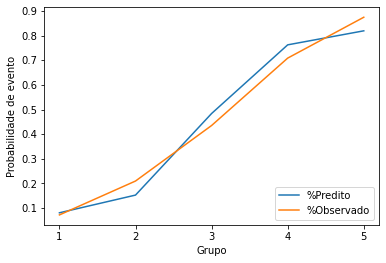

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')


**5.** Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [21]:
def indicadores(df: pd.DataFrame, variavel_resposta: str, previsao: str):
    acc = metrics.accuracy_score(df[variavel_resposta], df[previsao]>.5)
    print('Acurácia: {0:.2f}%'.format(acc*100))

    #AUC
    fpr, tpr, thresholds = metrics.roc_curve(df[variavel_resposta], df[previsao])
    auc_ = metrics.auc(fpr, tpr)
    #Gini
    gini = 2*auc_ -1
    #KS
    ks = ks_2samp(df.loc[df[variavel_resposta] == 1, previsao], df.loc[df[variavel_resposta] != 1, previsao]).statistic

    print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
          .format(ks*100, auc_*100, gini*100))

In [22]:
resultados = indicadores(df, 'flag_doente', 'predito')
resultados

Acurácia: 79.54%
KS: 59.30% 
AUC: 85.19% 
GINI: 70.39%


**6.** tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [23]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,303.0,NaN,NaN,NaN,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,NaN,NaN,NaN,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,NaN,NaN,NaN,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,NaN,NaN,NaN,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,NaN,NaN,NaN,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,NaN,NaN,NaN,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,NaN,NaN,NaN,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,NaN,NaN,NaN,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,NaN,NaN,NaN,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,NaN,NaN,NaN,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [24]:
reglog = smf.logit(" flag_doente ~ C(sex, Treatment(1)) + C(cp, Treatment(4)) + age + oldpeak + thalach + C(slope, Treatment(0))"
                   , data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.412000
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            9
Date:                Mon, 25 Jul 2022   Pseudo R-squ.:                  0.4027
Time:                        14:33:56   Log-Likelihood:                -124.84
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.388e-31
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.7993      2.013      0.397      0.691      -3.145       4.744
C(sex, Treatment(1))[T.0.0]      -1.8257      0.387     -4.720      0.000      -2.584      -1.068
C(cp, Treatment(4))[T.1.0]       -2.3920      0.589     -4.063      0.000      -3.546      -1.238
C(cp, Treatment(4))[T.2.0]       -1.6580      0.482     -3.440      0.001      -2.603      -0.713
C(cp, Treatment(4))[T.3.0]       -2.2466      0.403     -5.576      0.000      -3.036      -1.457
C(slope, Treatment(0))[T.2.0]     0.8802      0.392      2.245      0.025       0.112       1.649
C(slope, Treatment(0))[T.3.0]    -0.2310      0.801     -0.288      0.773      -1.802       1.339
age                               0.0374      0.020      1.888      0.059      -0.001       0.076
oldpeak                           0.6397      0.190      3.372      0.001       0.268       1.011
thalach                          -0.0164      0.009     -1.825      0.068      -0.034       0.001
=================================================================================================
"""

In [25]:
df['predito'] = reglog.predict(df)
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')

group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid['predito'] = group_reg['predito'].mean()
qualid['pct_doente'] = group_reg['flag_doente'].mean()

qualid

,contagem,predito,pct_doente
predito,,,
"(0.00752, 0.09]",61,0.046409,0.032787
"(0.09, 0.269]",60,0.163655,0.166667
"(0.269, 0.571]",61,0.415911,0.426230
"(0.571, 0.871]",60,0.726521,0.750000
"(0.871, 0.988]",61,0.940785,0.918033


Comparando com os resultados antigos:

- Acurácia: 79.54%
- KS: 59.30% 
- AUC: 85.19% 
- GINI: 70.39%

In [26]:
novos_resultados = indicadores(df, 'flag_doente', 'predito')
novos_resultados

Acurácia: 81.52%
KS: 65.60% 
AUC: 89.24% 
GINI: 78.49%


Vamos que houve grandes melhoras em todos os indicadores usados durante o exercício.